We will use simple data of mobile price range classifier. The dataset consists of 20 features and we need to predict the price range in which phone lies. These ranges are divided into 4 classes.\
\
'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi'

Before feeding data to our neural network we need it in a specific way so we need to process it accordingly. The preprocessing of data depends on the type of data. Here we will discuss how to handle tabular data and in later tutorials, we will handle image dataset

In [41]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

#dataset import
dataset = pd.read_csv('train.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [42]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [43]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

This step is used to normalize the data. Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values. It is an important step and you can check the difference in accuracies on our dataset by removing this step. It is mainly required in case the dataset features vary a lot as in our case the value of battery power is in the 1000’s and clock speed is less than 3. So if we feed unnormalized data to the neural network, the gradients will change differently for every column and thus the learning will oscillate.

Next step is to one hot encode the classes. One hot encoding is a process to convert integer classes into binary values. Consider an example, let’s say there are 3 classes in our dataset namely 1,2 and 3. Now we cannot directly feed this to neural network so we convert it in the form:

1- 1 0 0

2- 0 1 0

3- 0 0 1

Now there is one unique binary value for the class. The new array formed will be of shape (n, number of classes), where n is the number of samples in our dataset. We can do this using simple function by sklearn:

In [32]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

Generally, it is better to split data into training and testing data. Training data is the data on which we will train our neural network. Test data is used to check our trained neural network. This data is totally new for our neural network and if the neural network performs well on this dataset, it shows that there is no overfitting.

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

Keras is a simple tool for constructing a neural network. It is a high-level framework based on tensorflow, theano or cntk backends.

In our dataset, the input is of 20 values and output is of 4 values. So the input and output layer is of 20 and 4 dimensions respectively.

In [44]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In our neural network, we are using two hidden layers of 16 and 12 dimension.

Now we need to specify the loss function and the optimizer. It is done using compile function in keras.

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Here loss is cross entropy loss as discussed earlier. Categorical_crossentropy specifies that we have multiple classes. The optimizer is Adam. Metrics is used to specify the way we want to judge the performance of our neural network. Here we have specified it to accuracy.

Training step is simple in keras. model.fit is used to train it.



In [36]:
history = model.fit(X_train,y_train,epochs=105,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/105
29/29 [==============================] - 1s 7ms/step - loss: 1.5130 - accuracy: 0.2800 - val_loss: 1.3783 - val_accuracy: 0.3300
Epoch 2/105
29/29 [==============================] - 0s 2ms/step - loss: 1.3997 - accuracy: 0.3072 - val_loss: 1.3389 - val_accuracy: 0.3700
Epoch 3/105
29/29 [==============================] - 0s 3ms/step - loss: 1.3422 - accuracy: 0.3378 - val_loss: 1.3102 - val_accuracy: 0.3950
Epoch 4/105
29/29 [==============================] - 0s 2ms/step - loss: 1.2967 - accuracy: 0.3672 - val_loss: 1.2734 - val_accuracy: 0.4400
Epoch 5/105
29/29 [==============================] - 0s 2ms/step - loss: 1.2471 - accuracy: 0.4211 - val_loss: 1.2290 - val_accuracy: 0.4600
Epoch 6/105
29/29 [==============================] - 0s 2ms/step - loss: 1.1877 - accuracy: 0.4706 - val_loss: 1.1717 - val_accuracy: 0.5150
Epoch 7/105
29/29 [==============================] - 0s 3ms/step - loss: 1.1177 - accuracy: 0.5122 - val_loss: 1.1006 - val_accuracy: 0.5550
Epoch 8/105
2

In [37]:
y_pred = model.predict(X_test)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
# also inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

7/7 [==============================] - 0s 2ms/step


In [38]:
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 91.0


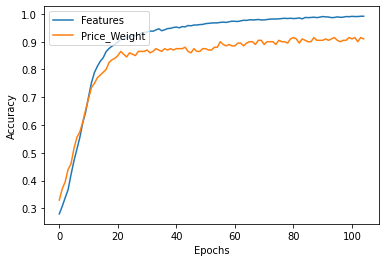

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

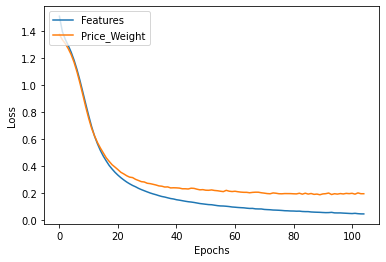

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

Usually, the dataset is very big and we cannot fit complete data at once so we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed.

Now we can check the model’s performance on test data: